In [2]:
import cv2
import math
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
from scipy import ndimage as ndi
from skimage.util import random_noise
%matplotlib inline

Text(0.5, 1.0, 'Original Image')

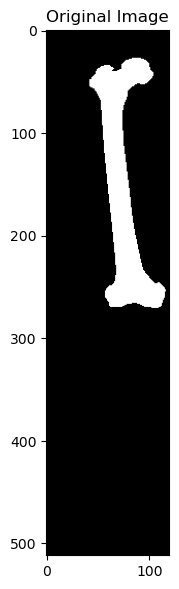

In [3]:
image_path= "bone1.jpg"
original_image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

croped_image = original_image[:, 0:120]

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.imshow(croped_image,cmap= 'gray')
plt.title('Original Image')

In [104]:
## region ที่เป็นสีขาว
def callGetRegionInImage(image):
  threshold = 200
  binary_mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]
  num_labels, lebels, stats, _ = cv2.connectedComponentsWithStats(binary_mask)
  # Print the count of regions (excluding the background)
  component_width = 0
  num_regions = num_labels - 1
  if(num_regions == 1):
    component_width = stats[1, cv2.CC_STAT_WIDTH]
  # print("Count of regions:", num_regions, 'index', index)
  return num_regions,component_width

In [96]:
def GetBounaryImage(image):
  # Threshold the image to obtain a binary image
  _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Initialize variables for the leftmost x-coordinate
  leftmost_x = np.inf
  rightmost_x = 0

  # Iterate through the contours
  for contour in contours:
      # Approximate the contour to a rectangle
      x, _, width, _ = cv2.boundingRect(contour)
      # Update the leftmost x-coordinate if necessary
      if x < leftmost_x:
          leftmost_x = x
      if x + width > rightmost_x:
          rightmost_x = x + width
  # Print the leftmost x-coordinate
  print("Leftmost x-coordinate:", leftmost_x)
  print("Rightmost x-coordinate:", rightmost_x)
  print('Max width',rightmost_x-leftmost_x)
  return rightmost_x-leftmost_x

Leftmost x-coordinate: 38
Rightmost x-coordinate: 91
Max width 53


Text(0.5, 1.0, 'Original Image')

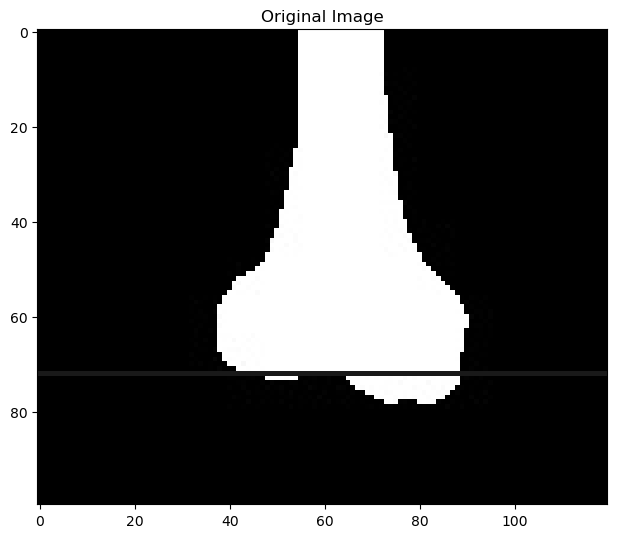

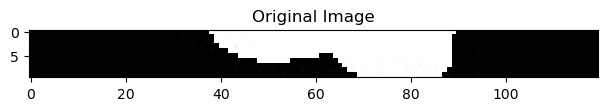

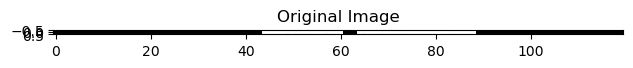

In [112]:
# First case
# 1.ถ้าเจอ 1 ก่อน
# 2. หาที่มากกว่า2 เพื่อ toggle ว่าเจอ 2 แล้ว
# 2. หา 1 เอา index

# Second case
# 1. ถ้าเจอ 2 ก่อน
# 2. หา 1 เอา index



# Draw the horizontal line on the image

defaultImage = cv2.imread('case2.jpg', cv2.IMREAD_GRAYSCALE)
defaultImage = defaultImage[200:300, 0:120]

max_width = GetBounaryImage(defaultImage)

image_with_line = defaultImage.copy()


isFoundNumberNotZero = False
case = 0
isFoundNumberMoreThanTwo = False
isAssginCase = False

selected_index = 0
for i in range (defaultImage.shape[0],1,-1):
  image = defaultImage[i-1:i,:]
  regionsCount, width = callGetRegionInImage(image)
  # print(regionsCount, case)
  match case:
    case 0:
      if(regionsCount == 0): pass
      if(regionsCount > 0 and isFoundNumberNotZero == False):
        isFoundNumberNotZero = True
        if(regionsCount == 1):
          case = 1
        else:
          case = 2
    case 1:
      if ( regionsCount >= 2): isFoundNumberMoreThanTwo = True
      if(isFoundNumberMoreThanTwo == True and regionsCount == 1): 
        selected_index= i
        # print('index',i,case)
        break
    case 2:
      if ( regionsCount >= 2): pass
      if (regionsCount == 1 and width > 0.8*(max_width)):
        selected_index= i
        # print('index',i,case)
        break

cv2.line(image_with_line, (0,selected_index), (200,selected_index), (25,160,122), 1)


plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.imshow(image_with_line,cmap= 'gray')
plt.title('Original Image')


plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.imshow(defaultImage[selected_index-5:selected_index+5,:],cmap= 'gray')
plt.title('Original Image')

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.imshow(defaultImage[selected_index:selected_index+1,:],cmap= 'gray')
plt.title('Original Image')

index 78 2
index 77 2
index 76 2
index 75 2
index 72 2
index 71 2
index 70 2
index 69 2
index 68 2
index 67 2
index 66 2
index 65 2
index 64 2
index 63 2
index 62 2
index 61 2
index 60 2
index 59 2
index 58 2
index 57 2
index 56 2
index 55 2
index 54 2
index 53 2
index 52 2
index 51 2
index 50 2
index 49 2
index 48 2
index 47 2
index 46 2
index 45 2
index 44 2
index 43 2
index 42 2
index 41 2
index 40 2
index 39 2
index 38 2
index 37 2
index 36 2
index 35 2
index 34 2
index 33 2
index 32 2
index 31 2
index 30 2
index 29 2
index 28 2
index 27 2
index 26 2
index 25 2
index 24 2
index 23 2
index 22 2
index 21 2
index 20 2
index 19 2
index 18 2
index 17 2
index 16 2
index 15 2
index 14 2
index 13 2
index 12 2
index 11 2
index 10 2
index 9 2
index 8 2
index 7 2
index 6 2
index 5 2
index 4 2
index 3 2
index 2 2


Text(0.5, 1.0, 'Original Image')

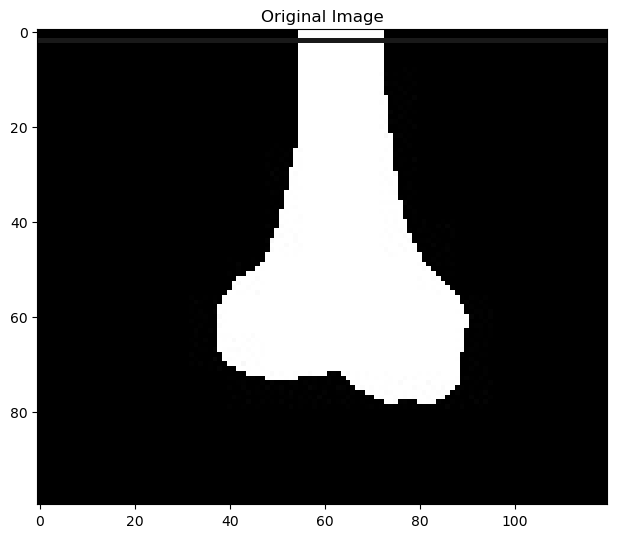

In [67]:
# Load the image as grayscale
image = cv2.imread('bone1.jpg', cv2.IMREAD_GRAYSCALE)
image = image[:,0:150]

print(GetBounaryImage(image),'123')


Leftmost x-coordinate: 42
Rightmost x-coordinate: 116
(42, 116) 123
